In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os


In [5]:
ion_data = pd.read_csv('data/train.csv')

In [6]:
test_data = pd.read_csv('data/test.csv')

In [80]:
submission = pd.read_csv('data/sample_submission.csv')

In [7]:
ion_data.head()


,time,signal,open_channels
0,0.0001,-2.7600,0
1,0.0002,-2.8557,0
2,0.0003,-2.4074,0
3,0.0004,-3.1404,0
4,0.0005,-3.1525,0


In [5]:
test_data.head()

,time,signal
0,500.0001,-2.6498
1,500.0002,-2.8494
2,500.0003,-2.8600
3,500.0004,-2.4350
4,500.0005,-2.6155


In [8]:
test_data['open_channels'] = train_data['open_channels']

In [6]:
#features for training data

#create a batch 
test_data['batch'] = 0
for i in range(0,10):
    ion_data.iloc[i*500000:500000*(i+1),3] = i
    
#rolling mean
test_data['simple_moving_avg_500'] = test_data['signal'].rolling(window=500).mean() 

#rolling standard deviation of signal
test_data['rolling_std_500'] = test_data['signal'].rolling(window=500).std()

#replace nan's with zero's in dataframe
test_data = test_data.fillna(0)

#create new column with average of signals by open_channels
test_data['avg_by_channel'] = test_data.groupby('open_channels').signal.transform('mean')

#create new column with average of signals by open_channels in a batch
test_data['avg_by_channel_in_batch'] = test_data.groupby(['batch','open_channels']).signal.transform('mean')

#save the cleaned data to a csv file
test_data.to_csv('test_kaggle_data_cleaned',index =False)

In [60]:
#features for training data

#create a batch 
ion_data['batch'] = 0
for i in range(0,10):
    ion_data.iloc[i*500000:500000*(i+1),3] = i
    
#rolling mean
ion_data['simple_moving_avg_500'] = ion_data['signal'].rolling(window=500).mean() 

#rolling standard deviation of signal
ion_data['rolling_std_500'] = ion_data['signal'].rolling(window=500).std()

#replace nan's with zero's in dataframe
ion_data = ion_data.fillna(0)

#create new column with average of signals by open_channels
ion_data['avg_by_channel'] = ion_data.groupby('open_channels').signal.transform('mean')

#create new column with average of signals by open_channels in a batch
ion_data['avg_by_channel_in_batch'] = ion_data.groupby(['batch','open_channels']).signal.transform('mean')

#save the cleaned data to a csv file
ion_data.to_csv('kaggle_ion_data_cleaned',index =False)

In [52]:
channel_1 = ion_data['open_channels'] ==0
batch_1 = ion_data['batch'] ==1
#ion_data[ion_data['open_channels']==0 & (ion_data['batch']==0)]

In [53]:
 ion_data[channel_1&batch_1]

,time,signal,open_channels,batch,simple_moving_avg_500,rolling_std_500,avg_by_channel,avg_by_channel_in_batch
500000,50.0001,-3.1094,0,1,-2.559554,0.463423,-2.261752,-2.433553
500001,50.0002,-3.2726,0,1,-2.560492,0.464392,-2.261752,-2.433553
500002,50.0003,-3.2302,0,1,-2.560770,0.464752,-2.261752,-2.433553
500003,50.0004,-3.0486,0,1,-2.560554,0.464499,-2.261752,-2.433553
500004,50.0005,-3.0789,0,1,-2.561728,0.465067,-2.261752,-2.433553
500005,50.0006,-2.8672,0,1,-2.562353,0.465268,-2.261752,-2.433553
500006,50.0007,-2.8689,0,1,-2.563059,0.465465,-2.261752,-2.433553
500007,50.0008,-2.8548,0,1,-2.562852,0.465312,-2.261752,-2.433553
500008,50.0009,-2.7416,0,1,-2.562896,0.465328,-2.261752,-2.433553
500009,50.0010,-3.0594,0,1,-2.563964,0.465854,-2.261752,-2.433553


In [57]:
#lets plot signal and rolling_mean_signal data
import matplotlib.pyplot as plt
%matplotlib inline

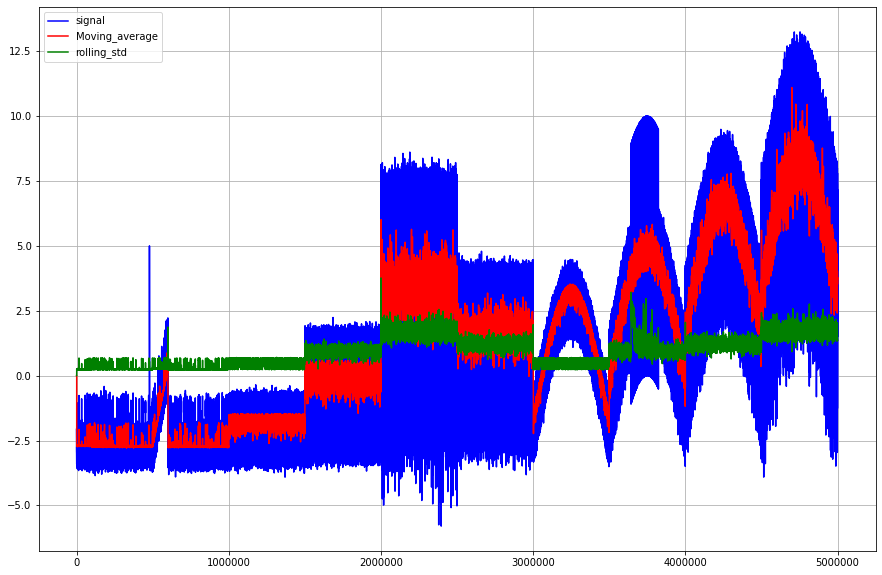

In [59]:
plt.figure(figsize = [15,10])
plt.grid(True)
plt.plot(ion_data['signal'],'b',label = 'signal')
plt.plot(ion_data['simple_moving_avg_500'],'r',label='Moving_average')
plt.plot(ion_data['rolling_std_500'],'g',label='rolling_std')
plt.legend(loc=2)

In [14]:
ion_data.batch.unique()


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
print(ion_data.isna().any().sum())

0


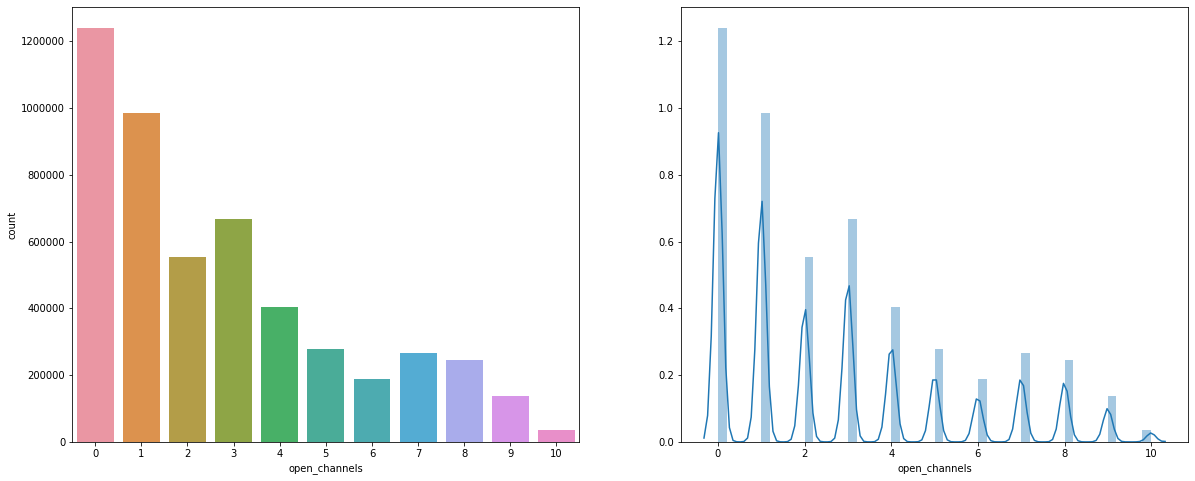

In [16]:
fig, ax = plt.subplots(1,2, figsize =(20,8))
sns.countplot(ion_data.open_channels,ax=ax[0])
sns.distplot(ion_data.open_channels,ax=ax[1])

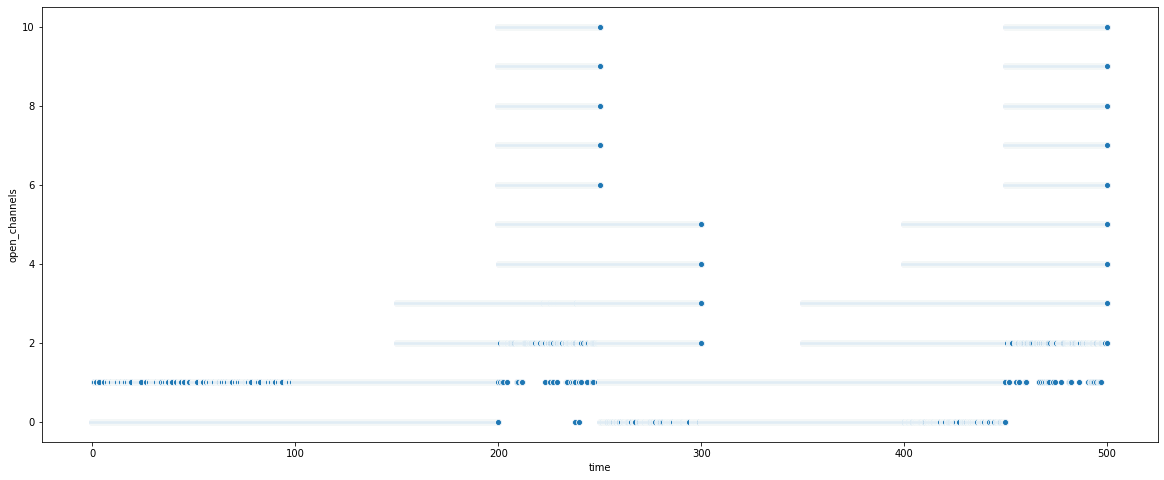

In [18]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='time',y='open_channels',data= ion_data)

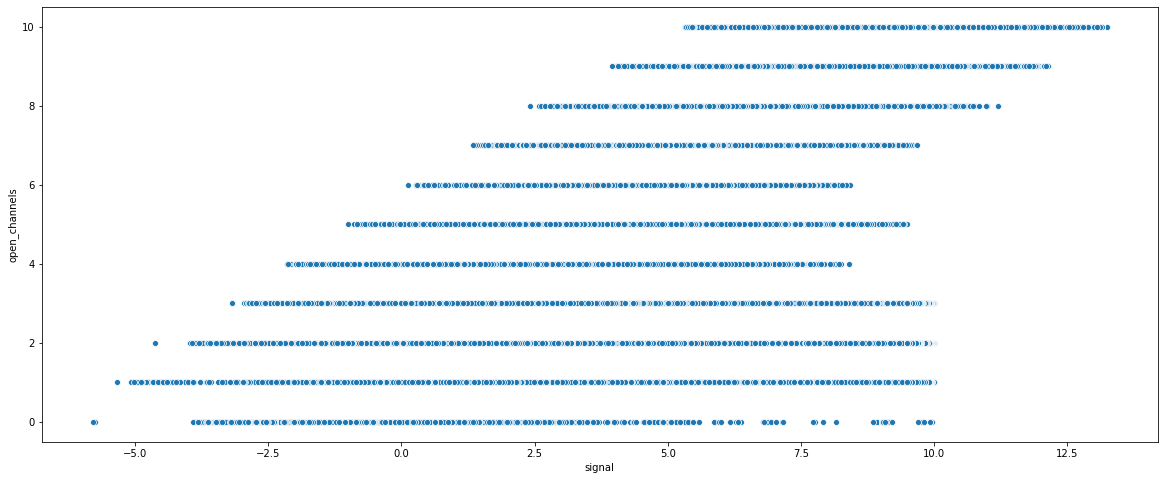

In [19]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='signal',y='open_channels',data= ion_data)

Insights:

Values 0 and 1 for open_channels is very frequent as compared to other values.
Values >= 6 occur between 200s and 250s and then between 450s and 500s. Seasonality? Maybe
Values 2 and 3 occur between 150s and 300s and then between 350s and 500s.

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x='time',y='signal',hue = 'open_channels', data = ion_data[ion_data['time']<100])

Cool. So, we can say that a single channel is opened only when the value of signal > -2.

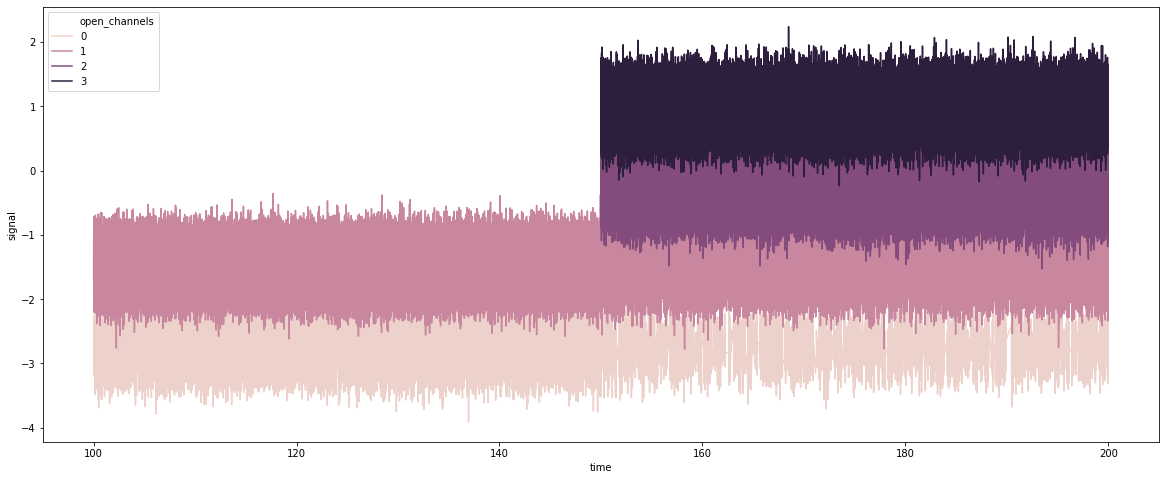

In [62]:
plt.figure(figsize=(20,8))
sns.lineplot(x='time',y='signal',hue='open_channels',data = ion_data[(ion_data['time']>100) &(ion_data['time']<200)])

In [2]:
ion_data.head()


Clearly, the number of open channels increases with increase in signal. This graph is in tune with our time vs open_channels graph.

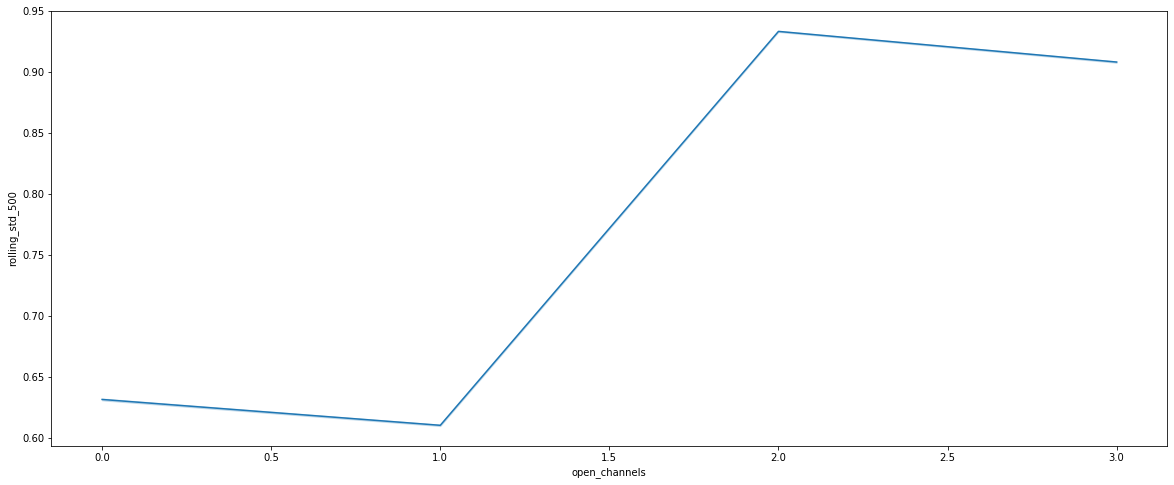

In [64]:
#plotting rolling_std_500
plt.figure(figsize=(20,8))
sns.lineplot(x='open_channels',y='rolling_std_500',data = ion_data[(ion_data['time']>100) &(ion_data['time']<200)])

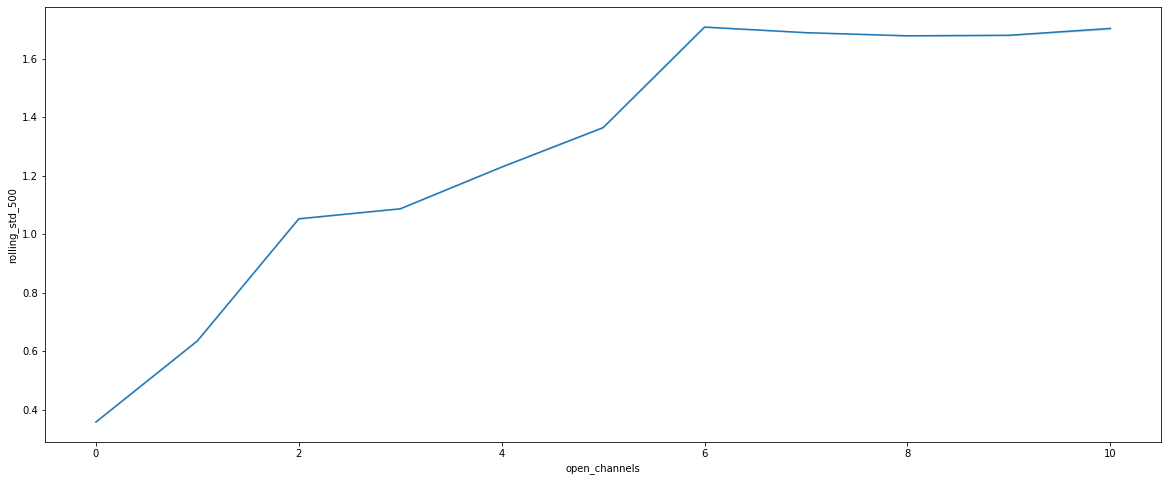

In [65]:
plt.figure(figsize=(20,8))
sns.lineplot(x='open_channels',y='rolling_std_500',data = ion_data)

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x='time', y='signal', hue='open_channels', data=ion_data[(ion_data['time'] > 300) & (ion_data['time'] < 400)])

Applying Models

#Regression Models

In [66]:
#Regression model using rolling standard deviation

from sklearn.linear_model import LinearRegression
X=pd.DataFrame(ion_data['rolling_std_500'])
y=pd.DataFrame(ion_data['open_channels'])

lr = LinearRegression()
lr.fit(X,y)

y_pred = lr.predict(test_data[['signal']])

submission1 =pd.DataFrame()
submission1['time'] = test_data.time
submission1['open_channels'] = y_pred.astype(int)

In [74]:
print(lr.intercept_)

[-1.35173479]


In [75]:
#retrieve slope
print(lr.coef_)

[[4.31526294]]


In [98]:
submission1.open_channels.unique()

array([-12, -13, -11, -14, -10, -15, -16,  -9,  -8,  -7,  -6,  -5,  -4,
        -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
        10,  11,  12,  13,  14,  15,  16,  17,  18,  19, -17,  26,  28,
        31,  29,  25,  27,  30,  23,  32,  22,  24,  21,  20, -23,  34,
        33, -21, -19, -18, -22, -25, -20,  35,  36,  38,  37,  39,  40,
        41,  43,  42,  44,  45])

In [57]:
#Regression model using rolling average 

from sklearn.linear_model import LinearRegression
X=pd.DataFrame(ion_data['simple_moving_avg_500'])
y=pd.DataFrame(ion_data['open_channels'])

lr = LinearRegression()
lr.fit(X,y)

y_pred = lr.predict(test_data[['signal']])

submission2 =pd.DataFrame()
submission2['time'] = test_data.time
submission2['open_channels'] = y_pred.astype(int)

#submission2.time = submission2.time.apply(lambda x: '{:.4f}'.format(x))
submission2.to_csv('data/submission3.csv',index=False)

In [9]:
submission2.tail()
submission2.open_channels.unique()

NameError: name 'submission2' is not defined

In [ ]:
#evaluation of algorithm

In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_pred = y_pred.astype(int)

NameError: name 'X' is not defined

In [1]:
lr.score()

NameError: name 'lr' is not defined

In [56]:
#evaluation of model
from sklearn import metrics
import numpy as np
print('Mean Abosulte error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

NameError: name 'y_test' is not defined